In [ ]:
import os

In [ ]:
os.environ['PYTHONPATH']

In [ ]:
from globalenergydemand.run_country import RunCountry

In [ ]:
rc = RunCountry(
    countries_path = os.path.join(os.environ['PYTHONPATH'],'data','iso2.csv'), 
    ucdb_path = os.path.join(os.environ['PYTHONPATH'],'data','GHSL_UCDB','GHS_STAT_UCDB2015MT_GLOBE_R2019A_V1_1.gpkg'), 
    ne_path=os.path.join(os.environ['PYTHONPATH'],'data','ne','ne_10m_countries.gpkg') ,
    save_dir=os.path.join(os.environ['PYTHONPATH'],'data','GHSL_UCDB_PROCESSED'))

In [ ]:
rc.run_country('AF')

In [ ]:
ucdb_slice = rc.ucdb[rc.ucdb.XC_ISO_LST.str.contains(rc.iso3)]

In [ ]:
for row in ucdb_slice.iterrows():
    if row[1].geometry.type=='Polygon':
        a = row[1].exterior.coords

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(os.path.join(os.environ['PYTHONPATH'], 'data', 'edgar', '2015_1A2_manufacturing.txt'),skiprows=2,delimiter=';')

In [ ]:
df.loc[:,'lat'] = (df.lat+90)*10
df.loc[:,'lon'] = (df.lon+180)*10

In [ ]:
df

In [ ]:
arr = np.zeros((3600,1800))

In [ ]:
for row in df.iterrows():
    arr[int(row[1].lon), int(row[1].lat)]=row[1]['emission 2015 (tons)']

In [ ]:
np.savez(os.path.join(os.environ['PYTHONPATH'], 'data', 'edgar', '2015_1A2_manufacturing.npz'), arr=arr)

In [ ]:
from area import area
from shapely import geometry

In [ ]:
pp = geometry.Polygon([[0,0],[0,0.1],[0.1,0.1],[0.1,0]])

In [ ]:
pix_arr = area(geometry.mapping(pp))

In [ ]:
pix_arr #m^2

In [ ]:
area_arr = np.zeros((3600,1800))

In [ ]:
delll=0.1
for ii in range(1800):
    lat = (ii/10-90)
    pp = geometry.Polygon([[0,lat],[0,lat+delll],[0+delll,lat+delll],[0+delll,lat]])
    pix_arr = area(geometry.mapping(pp))
    area_arr[:,ii]=pix_arr
    print (lat, pix_arr)

In [ ]:
np.savez(os.path.join(os.environ['PYTHONPATH'], 'data', 'edgar', 'area_arr.npz'),arr=area_arr)

In [ ]:
from netCDF4 import Dataset

In [ ]:
ds = Dataset(os.path.join(os.environ['PYTHONPATH'], 'data', 'edgar', '2015_1A2_manufacturing.nc'),'r')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
arr_ncf = np.array(ds.variables['emi_co2'])

In [ ]:
arr_ncf = (arr_ncf.T*area_arr)*8760/1000*60*60

In [ ]:
np.min(arr_ncf), np.max(arr_ncf)

In [ ]:
np.sum(arr), np.min(arr), np.max(arr)

In [ ]:
fig, axs = plt.subplots(2,1,figsize=(18,18))
axs[0].imshow(arr.T, vmin=0, vmax=100000, origin='lower')
axs[1].imshow(np.roll(arr_ncf.T,-1800,axis=1), vmin=0, vmax=100000, origin='lower')

#### Sample poly

In [28]:
import os
import numpy as np

from shapely.affinity import affine_transform
from functools import partial
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

from netCDF4 import Dataset
from shapely import wkt, geometry

In [4]:
import geopandas as gpd

In [51]:
import pandas as pd

In [55]:
df = pd.read_csv('/home/lucas/repos/global-energy-demand/data/iea_balances_public/ireland_IE.csv').set_index('Unnamed: 0')

In [57]:
df.index = df.index.str.lower()

In [64]:
df.loc[:,['Coal*','Hydro']].sum(axis=1)

Unnamed: 0
production                             738.0
imports                               1155.0
exports                                -14.0
international marine bunkers***          0.0
international aviation bunkers****       0.0
stock changes                          266.0
tpes                                  2145.0
transfers                                0.0
statistical differences                 23.0
electricity plants                   -1673.0
chp plants                              -8.0
heat plants                              0.0
gas works                                0.0
oil refineries                           0.0
coal transformation                     -4.0
liquefication plants                     0.0
other transformation                     0.0
energy industry own use                -12.0
losses                                   0.0
total final consumption                471.0
industry                               111.0
transport                                0.0

In [63]:
df.append(df.loc[['commercial and public services','residential'],:].sum().rename('buildings'))

,Biofuels and waste,Coal*,Crude oil,Electricity,"Geothermal, solar, etc.",Heat,Hydro,Natural gas,Nuclear,Oil products,Total**
Unnamed: 0,,,,,,,,,,,
production,437.0,679.0,0.0,0.0,543.0,0.0,59.0,2483.0,0.0,0.0,4201.0
imports,141.0,1155.0,3269.0,75.0,0.0,0.0,0.0,1700.0,0.0,5757.0,12097.0
exports,0.0,-14.0,0.0,-136.0,0.0,0.0,0.0,0.0,0.0,-1612.0,-1762.0
international marine bunkers***,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-150.0,-150.0
international aviation bunkers****,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-844.0,-844.0
stock changes,-7.0,266.0,1.0,0.0,0.0,0.0,0.0,59.0,0.0,66.0,386.0
tpes,572.0,2086.0,3270.0,-61.0,543.0,0.0,59.0,4242.0,0.0,3217.0,13928.0
transfers,0.0,0.0,-24.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,-8.0
statistical differences,13.0,23.0,7.0,-45.0,0.0,0.0,0.0,-24.0,0.0,-191.0,-218.0


In [3]:
ds = Dataset('/home/lucas/repos/global-energy-demand/data/edgar/2015_1A2_manufacturing.nc','r')

In [8]:
gdf = gpd.read_file('/home/lucas/repos/global-energy-demand/data/GHSL_UCDB_EUCLID/IE.gpkg')

In [68]:
import json

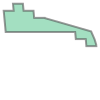

In [69]:
geometry.shape(json.loads(gdf.iloc[0]['geom_gj']))

In [13]:
geometry.mapping(gdf.iloc[0].geometry)

{'type': 'Polygon',
 'coordinates': (((-6.113082807988027, 53.41280298204315),
   (-6.126024618877499, 53.41226487656025),
   (-6.130306734130082, 53.41788844456134),
   (-6.143200062979231, 53.41671036474303),
   (-6.144098200348598, 53.41788967603985),
   (-6.144098200348597, 53.42652891601883),
   (-6.144996876096184, 53.42770896956699),
   (-6.157889666567113, 53.426527684017124),
   (-6.161936242562823, 53.43184042256617),
   (-6.1677938416438405, 53.43243441649222),
   (-6.17779384164384, 53.428356696245324),
   (-6.178888518628687, 53.42735293246011),
   (-6.179726214361621, 53.42720733097985),
   (-6.186778740250301, 53.426964306150495),
   (-6.18779384164384, 53.427273919115414),
   (-6.196778740250301, 53.426964306150495),
   (-6.19779384164384, 53.427273919115414),
   (-6.206778740250301, 53.426964306150495),
   (-6.20779384164384, 53.427273919115414),
   (-6.216778740250301, 53.426964306150495),
   (-6.217793841643839, 53.427273919115414),
   (-6.2267787402503005, 53.426964

In [15]:
shp = wkt.loads(wkt.dumps(gdf.iloc[0].geometry, rounding_precision=1))

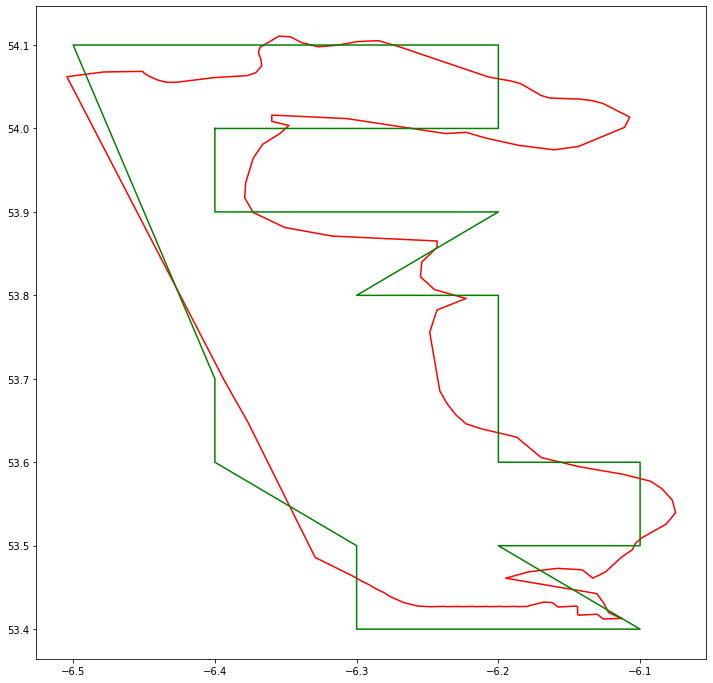

In [18]:
fig, ax = plt.subplots(1,1,figsize=(12,12))
xs, ys = gdf.iloc[0].geometry.exterior.xy
ax.plot(xs,ys,c='r')
xs,ys = shp.buffer(0).exterior.xy
ax.plot(xs,ys,c='g')

In [25]:
dt_shapely = [10, 0, 0, 10, 1800, 900]

In [26]:
geometry.mapping(affine_transform(shp,dt_shapely))

{'type': 'Polygon',
 'coordinates': (((1739.0, 1434.0),
   (1739.0, 1434.0),
   (1739.0, 1434.0),
   (1739.0, 1434.0),
   (1739.0, 1434.0),
   (1739.0, 1434.0),
   (1739.0, 1434.0),
   (1738.0, 1434.0),
   (1738.0, 1434.0),
   (1738.0, 1434.0),
   (1738.0, 1434.0),
   (1738.0, 1434.0),
   (1738.0, 1434.0),
   (1738.0, 1434.0),
   (1738.0, 1434.0),
   (1738.0, 1434.0),
   (1738.0, 1434.0),
   (1738.0, 1434.0),
   (1738.0, 1434.0),
   (1738.0, 1434.0),
   (1738.0, 1434.0),
   (1738.0, 1434.0),
   (1738.0, 1434.0),
   (1738.0, 1434.0),
   (1738.0, 1434.0),
   (1738.0, 1434.0),
   (1738.0, 1434.0),
   (1737.0, 1434.0),
   (1737.0, 1434.0),
   (1737.0, 1434.0),
   (1737.0, 1434.0),
   (1737.0, 1434.0),
   (1737.0, 1435.0),
   (1737.0, 1435.0),
   (1737.0, 1435.0),
   (1737.0, 1435.0),
   (1736.0, 1436.0),
   (1736.0, 1437.0),
   (1735.0, 1441.0),
   (1735.0, 1441.0),
   (1735.0, 1441.0),
   (1735.0, 1441.0),
   (1736.0, 1441.0),
   (1736.0, 1441.0),
   (1736.0, 1441.0),
   (1736.0, 1441.0),

In [46]:
im = Image.fromarray(np.zeros((3600, 1800)), mode='L')
draw = ImageDraw.Draw(im)

for ii_r,row in enumerate(gdf.iterrows()):
    shp = wkt.loads(wkt.dumps(row[1].geometry, rounding_precision=1))
    pix_shp = affine_transform(shp.buffer(0), dt_shapely)
    
    if pix_shp.type=='MultiPolygon' and not pix_shp.is_empty:
        for subshp in list(pix_shp):
            lons, lats = subshp.exterior.xy
            draw.polygon(list(zip(lats, lons)), fill=100+25*ii_r)
    elif pix_shp.type=='Polygon' and not pix_shp.is_empty:
        lons, lats = pix_shp.exterior.xy
        draw.polygon(list(zip(lats, lons)), fill=100+25*ii_r)

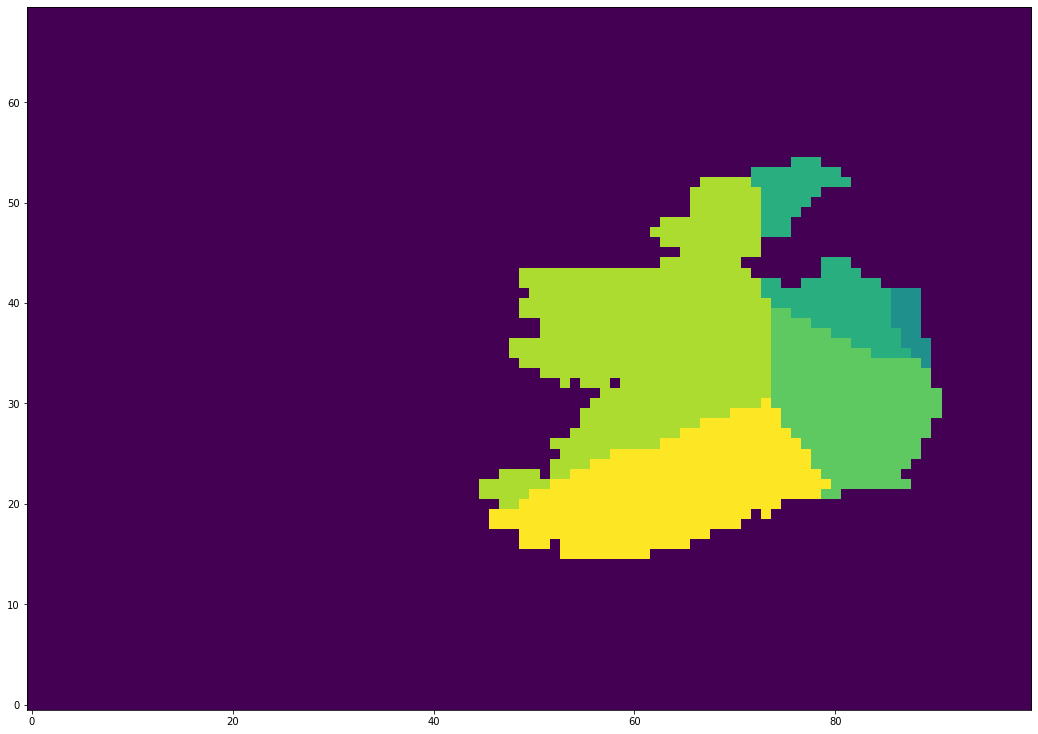

In [49]:
fig, ax = plt.subplots(1,1,figsize=(18,18))
ax.imshow(np.array(im).T[1400:1470,1650:1750],origin='lower')

In [ ]:
np.max(arr), np.min(arr)